In [1]:
using Plots;
using Images;

## Day 2 - Morning Session
**Outline**
- atoms and crystal structure
- how electron's behave
- the Schrödinger equation
- the problem...

## atoms and crystal structure

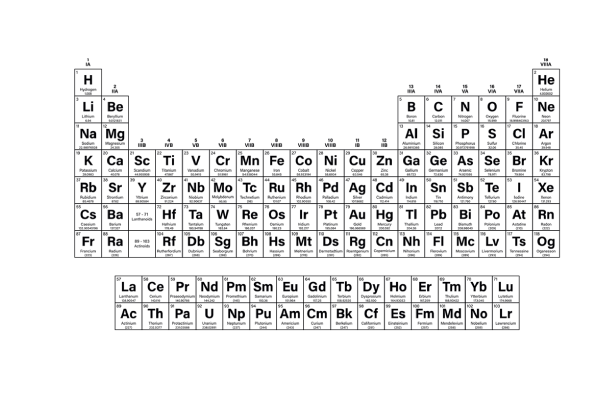

In [2]:
img = load("../../img/periodic_table.png")
plot(img,grid=false, axis=nothing, showaxis=false)

**brief basics of periodic table**
 - increasing the number of protons (electrons)
 - structure: nucleus (protons and neutrons) and electrons
 - all of life (C, H, N, O, S, P)

In [3]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;

n=100;
anim = @animate for i ∈ 1:n
    r = 0.05
    p=plot(circle(0,0,0.9), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
    plot!(p, title="Cartoon of hydrogen", showaxis=false);
    annotate!(p, 0, 0.2, "Z=1");
    x = cos(2π*i/n)
    y = sin(2π*i/n)
    plot!(p, circle(-x*0.9,y*0.9,r), seriestype=[:shape], lw=0, c=:blue, fillalpha=0.75)
end;

┌ Info: Saved animation to 
│   fn = /Users/harrisonlabollita/botana_group/outreach/CdeAz2021/day2/slides/hydrogen.gif
└ @ Plots /Users/harrisonlabollita/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/Users/harrisonlabollita/botana_group/outreach/CdeAz2021/day2/slides/hydrogen.gif")
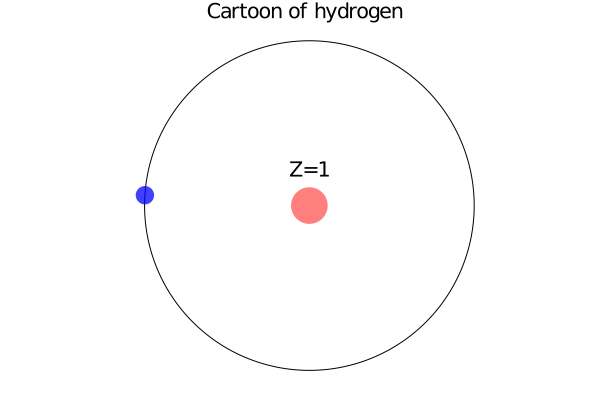

In [4]:
gif(anim, "hydrogen.gif", fps=20)

### but not quite

This picture isn't quite right...

In [5]:
using PyPlot

u = range(0,stop=2*π,length=n);
v = range(0,stop=π,length=n);

x = cos.(u) * sin.(v)';
y = sin.(u) * sin.(v)';
z = ones(n) * cos.(v)';
p = plot(x,y,z, rstride=4, cstride=4, alpha=0.25, color = "blue", showaxis=false)
r = 0.2
x = r *cos.(u) * sin.(v)';
y = r * sin.(u) * sin.(v)';
z = r * ones(n) * cos.(v)';
plot!(p, x,y,z, rstride=4, cstride=4, alpha=1, color = "red", showaxis=false)
plot!(p, aspect_ratio=0.75, legend=false, showaxis=false, grid=false, xticks=[], yticks=[],zticks=[]);

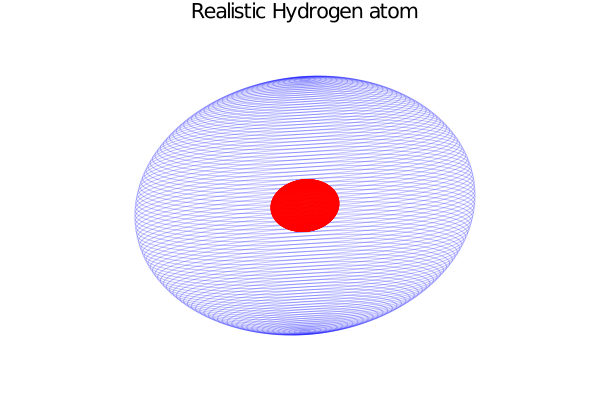

In [6]:
plot!(p, title="Realistic Hydrogen atom")

The electron can be anywhere in the cloud, but what's the scale..?


In [7]:
# If the proton where a tennis ball...
proton = 0.8e-15 # m
electron_cloud = 0.5e-10 # m
scale = electron_cloud/proton
tennis_ball = 6.86e-2 # m
println("The size of the electron cloud at tennis ball scale is $(round(scale*tennis_ball/1000)) km or $(round(scale*tennis_ball/1000*0.621371)) mi.")

The size of the electron cloud at tennis ball scale is 4.0 km or 3.0 mi.


## how electron's behave

In [8]:
# mass
electron_mass = 9e-31 #kg
proton_mass = 1.6e-27 #kg
println("proton mass / electron mass = $(round(proton_mass/electron_mass))")

proton mass / electron mass = 1778.0


- heavy center
- electrons swimming around in empty space

### cans and can'ts
- can't be labelled
- charge (**opposites attact** and **likes repel**)
- spin   (can't be in the same spot with the same spin)
- also, we can't ever really know where the electrons are!

## the Schrödinger equation

- [Erwin Schrödinger](https://en.wikipedia.org/wiki/Erwin_Schrödinger) wrote down the equation

$$ H\psi = E \psi $$

**We just can't solve it!**

## the problem...

### starting simple 

Say we only want to keep track of the spin of N electrons. Their spin can be either up or down. 

We have to keep track of all of the possible configurations

In [9]:
spins = 2                  # up and down
N     = collect(1:5:100)    # number of electons
for num ∈ N
    println("num e: $(num)  possible configs $(spins^num)")
end

num e: 1  possible configs 2
num e: 6  possible configs 64
num e: 11  possible configs 2048
num e: 16  possible configs 65536
num e: 21  possible configs 2097152
num e: 26  possible configs 67108864
num e: 31  possible configs 2147483648
num e: 36  possible configs 68719476736
num e: 41  possible configs 2199023255552
num e: 46  possible configs 70368744177664
num e: 51  possible configs 2251799813685248
num e: 56  possible configs 72057594037927936
num e: 61  possible configs 2305843009213693952
num e: 66  possible configs 0
num e: 71  possible configs 0
num e: 76  possible configs 0
num e: 81  possible configs 0
num e: 86  possible configs 0
num e: 91  possible configs 0
num e: 96  possible configs 0


We need to keep track of $10^{23}$ electrons